# Setup

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
from cycler import cycle

import qutip as qp

import scqubits as scq


import colormaps as cmaps
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('png')

import itertools as itert

import IPython.display

import sys

import copy

import pickle

import json

import pathlib

import os

from datetime import datetime



path_to_package = str(pathlib.Path(os.getcwd()))+'/Code/'
print(path_to_package)
sys.path.insert(0,path_to_package)


import importlib

import Transmon_Cavity_Model as TCM

/local/gr400/Git Repositories/Code-Demos/Transmon Cavity Mode Code/Code/


In [7]:
scq.settings.OVERLAP_THRESHOLD = 0.25


In [2]:
importlib.reload(TCM)

<module 'Transmon_Cavity_Model' from '/local/gr400/Git Repositories/Code-Demos/Transmon Cavity Mode Code/Code/Transmon_Cavity_Model.py'>

# Making A Model

## Some Notes

from https://scqubits.readthedocs.io/en/v4.0/guide/qubits/transmon.html

Transmon Hamiltonian:
$$ H_{\text{T}} = 4E_C(\hat{n}-n_g)^2-\frac{1}{2}E_J\sum_n\left(|n\rangle\langle n+1| + \text{h.c.}\right)$$


Oscillator:
$$ H_\text{osc} = E_\text{osc}\hat{a}^\dagger \hat{a} $$

Interaction:
$$H_I = g\hat{n}(\hat{a}+\hat{a}^\dagger)$$

So, full bare hamiltonian:
$$ H = {\color{cyan}4E_C(\hat{n}-n_g)^2-\frac{1}{2}E_J\sum_n\left(|n\rangle\langle n+1| + \text{h.c.}\right)} + {\color{limegreen} E_\text{osc}a^\dagger a} + g {\color{cyan}\hat{n}}({\color{limegreen} \hat{a}+\hat{a}^\dagger})$$

For now, $n_g=0$ which leaves
$$ H = {\color{cyan}4E_C\hat{n}^2-\frac{1}{2}E_J\sum_n\left(|n\rangle\langle n+1| + \text{h.c.}\right)} + {\color{limegreen} E_\text{osc}a^\dagger a} + g {\color{cyan}\hat{n}}({\color{limegreen} \hat{a}+\hat{a}^\dagger})$$

Also, we denote the transmon levels by letters: g, e, f, h,... with 'g' being the ground state, 'e' the first excited and so on. 

## Defining a Model

In [12]:
E_J =  26.96976142643705
E_C = 0.10283303447280807
E_osc = 6.2280871213
g = 0.026184375000000013
N_Transmon = 8
N_Cavity =  8  # By default, the model adds 2 extra levels to both the transmon and the cavity. This number is considered the levels of interest. The extras are buffers

Defining_Model_Example_Model = TCM.Transmon_Cavity_Model(E_J = E_J, E_C = E_C, E_osc = E_osc, g = g, N_Cavity=N_Cavity, N_Transmon=N_Transmon)

## Importing A Model

We will import the model that we will be using for the rest of this notebook here. The data for this model lives in "ModelSaves/Example_Model/Example_Model.json". The json file contains all the model parameters as well as a dictionary of calibrated pulses. 

In [3]:
model_name = "Example_Model"
path_to_model = "ModelSaves/"+model_name+'/'+model_name+'.json'
print(f'Path To Model: {path_to_model}')

Main_Model = TCM.LoadModel(path_to_model)

Path To Model: ModelSaves/Example_Model/Example_Model.json


# Calibrating Control Pulses

## Already Calibrated Pulses

"op_drive_params_dict" is a dictionary containing calibrated control pulses where the key is the name of the pulse.

In [43]:
Main_Model.op_drive_params_dict.keys()

dict_keys(['sb_f_0_Main', 'sb_f_1_Main', 'sb_f_2_Main', 'sb_f_3_Main', 'sb_f_1_2pi_f_3', 'sb_f_0_4pi_f_3', 'half_sb_f_1', 'q_g_0_Main', 'q_g_1_Main', 'q_g_2_Main', 'q_g_3_Main', 'q_e_3_Main', 'q_e_2_Main', 'q_e_1_Main', 'q_e_0_Main', 'half_q_e_0', 'half_q_e_0_Long'])

In [51]:
print(Main_Model.op_drive_params_dict['q_g_0_Main'])
print(Main_Model.op_drive_params_dict['sb_f_0_Main'])

{'Envelope': 'Guassian', 'shift': 0.0003114098996602884, 'epsilon': 0.005, 'Envelope Args': {'sigma': 25.5, 'mu': 51.0}, 'freq_d': 4.6037423584481445, 'pulse_time': 100.0}
{'Envelope': 'Sine_Squared_Ramp', 'shift': 0.05303586333437701, 'epsilon': 0.88, 'Envelope Args': {'ramp_time': 10, 'pulse_time': 177.8}, 'freq_d': -2.870147109080264, 'pulse_time': 177.8}


## Calibrating New Pulses

### Transmon Transition Pulses

Suppose we want to change the level of the transmon, say sending $|g0\rangle\to|e0\rangle$ via a pulse with a guassian envelope.

Step 1, define the initial parameters

Doing step 1/10, t = 98.0
10.0%. Run time:   0.88s. Est. time left: 00:00:00:07
20.0%. Run time:   1.75s. Est. time left: 00:00:00:06
30.0%. Run time:   2.62s. Est. time left: 00:00:00:06
40.0%. Run time:   3.48s. Est. time left: 00:00:00:05
50.0%. Run time:   4.34s. Est. time left: 00:00:00:04
60.0%. Run time:   5.18s. Est. time left: 00:00:00:03
70.0%. Run time:   6.01s. Est. time left: 00:00:00:02
80.0%. Run time:   6.80s. Est. time left: 00:00:00:01
90.0%. Run time:   7.56s. Est. time left: 00:00:00:00
Total run time:   8.32s
Transition prob: 0.9979210540676146
-----------------------------------------------------------------

Doing step 2/10, t = 98.44444444444444
10.0%. Run time:   0.89s. Est. time left: 00:00:00:07
20.0%. Run time:   1.77s. Est. time left: 00:00:00:07
30.0%. Run time:   2.64s. Est. time left: 00:00:00:06
40.0%. Run time:   3.58s. Est. time left: 00:00:00:05
50.0%. Run time:   4.44s. Est. time left: 00:00:00:04
60.0%. Run time:   5.31s. Est. time left: 00:00:00:0

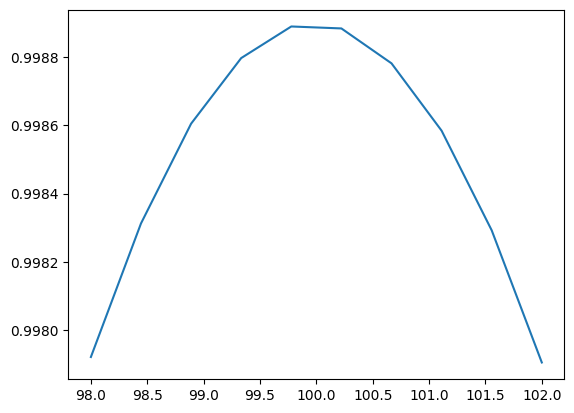

In [50]:
op_name = 'Transmon_Example_g0_to_e0'

epsilon = 0.005 # This is the drive strength. For a small drive strength like this, we don't need to worry about the stark shift
shift = 0 # Stark shift
Envelope = 'Guassian'

pulse_args = dict(op_name = op_name, epsilon = epsilon, Envelope=Envelope, shift = 0)


state1 = ['g',0]
state2 = ['e',0]

# The pulse calibrator searches over a range of time given by t0 and tf with a number of steps given by steps
t0 = 98 
tf = 102
steps = 10

Main_Model.CalibratePulse('Guassian', state1, state2, args = pulse_args, t0 = t0, tf = tf, steps = steps, op_name=op_name)

### Calibrate Sideband Pulse 

Sideband pulses send 2 transmon quanta to 1 cavity quanta like $|f0\rangle\to |g1\rangle$. 

This operation requeries strong drive strengths, and thus we first need to find the stark shift. This is done by using the ".GetStarkShift" function. By default, this function looks for the data for a polynomial fit generated from fitting many stark shifts and uses that. This example does not have that data. So we set "use_fit" to False, which causes it to call "FindResonanceFloquet" which requires a kwarg dictionary containing a list of ~10 initial stark shift guesses. It also usually needs a large integration step cap for the ode solver, hence the Odeoptions lines at the top of the cell. 

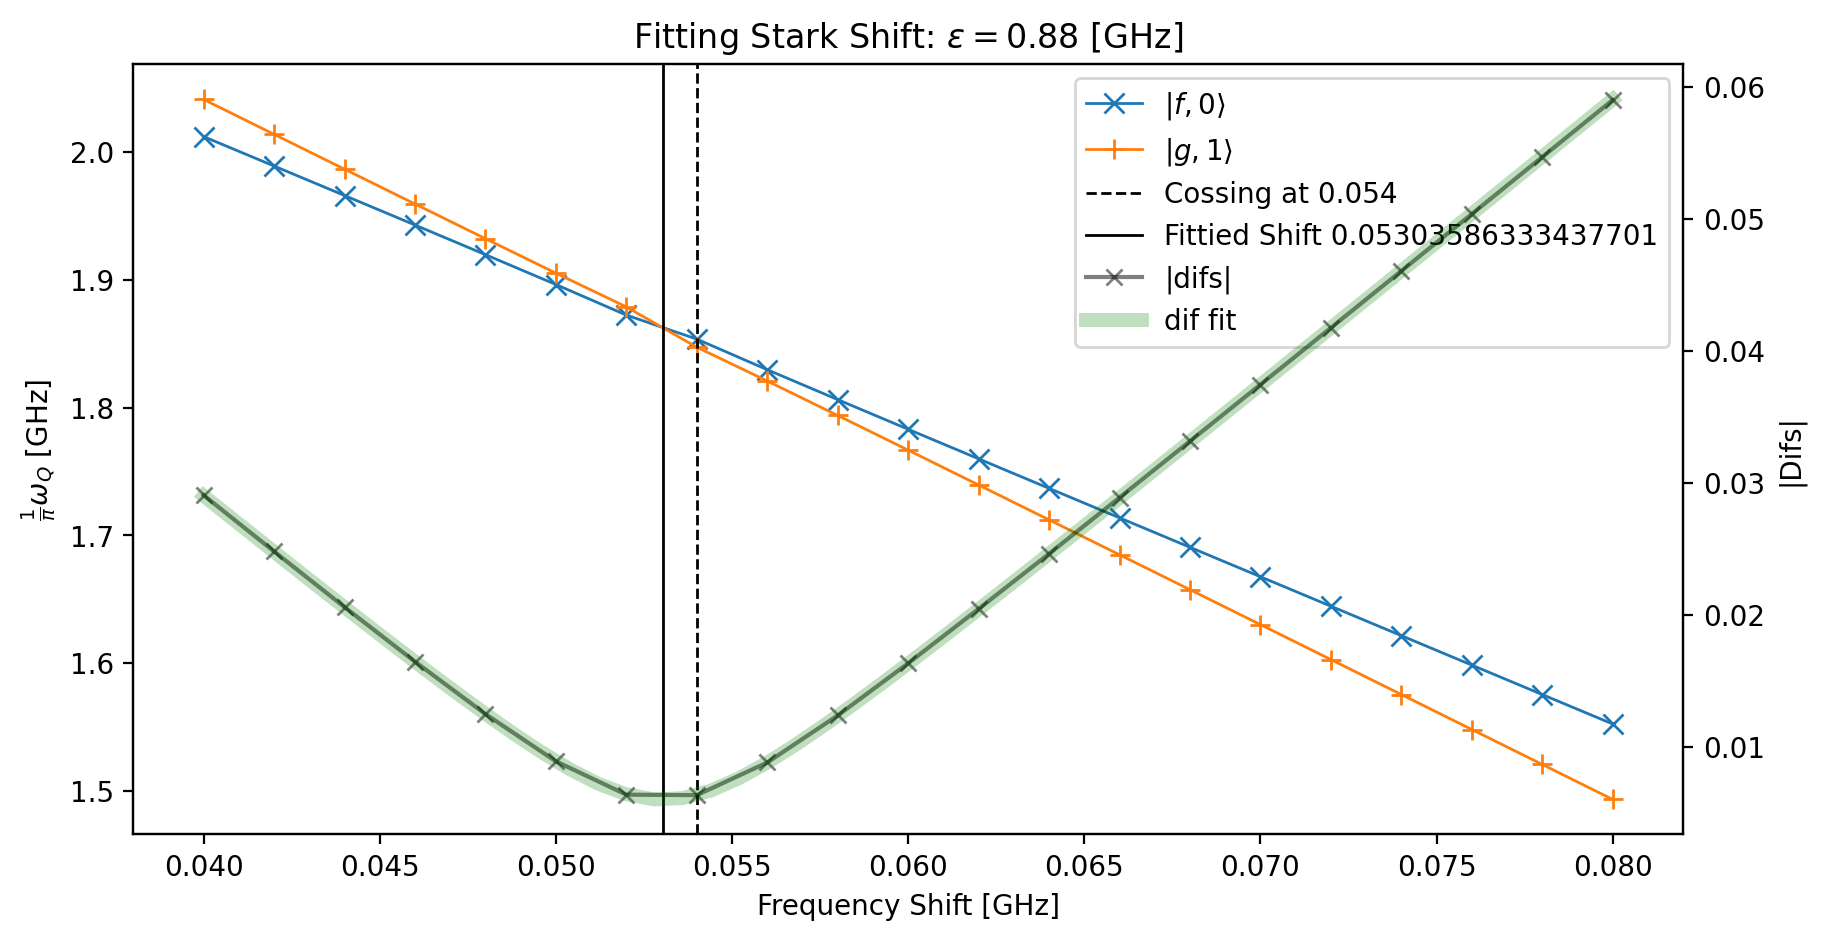

Stark Shift: 0.05303586333437701
Initial Guess for Drive Time: 166.51133579962922


In [59]:
Odeoptions = {'nsteps': 1000000, 'max_step':1/1000, 'atol':1e-14, 'rtol':1e-14}
solver_ops = qp.Options(**Odeoptions)

pulse_name = 'sb_f_0_Example'
epsilon = 0.88

state1 = ['f',0]
state2 = ['g',1]

freq_d = Main_Model.DefaultFrequency(state1, state2)

stark_shifts = np.linspace(0.04, 0.08, 21)

kwargs = {'shifts': stark_shifts, 'show_plot':True, 'options':solver_ops}


sb_f_0_Ex_Stark_Shift_Res = Main_Model.GetStarkShift(state1, state2, epsilon, use_fit = False, kwargs = kwargs)

print(f"Stark Shift: {sb_f_0_Ex_Stark_Shift_Res['x'][0]}")
print(f"Initial Guess for Drive Time: {1/sb_f_0_Ex_Stark_Shift_Res['fun']}")

# Driving the System and Running Pulse Sequences

## Single Drives using the ".Drive_State" Function

In [20]:
epsilon = Main_Model.op_drive_params_dict['sb_f_0_Main']['epsilon']
freq_d = Main_Model.op_drive_params_dict['sb_f_0_Main']['freq_d']
stark_shift = Main_Model.op_drive_params_dict['sb_f_0_Main']['shift']
args = {'Envelope':'Sine_Squared_Ramp', 'epsilon':epsilon, 'freq_d':freq_d, 'shift':stark_shift, 'pulse_time':1000}
args['Envelope Args'] = {'ramp_time':10}

psi0 = Main_Model.get_dressed_state(['f',0])

SingleDriveRes = Main_Model.Drive_State(psi0=psi0, args = args, spps = 10)

10.0%. Run time:   4.94s. Est. time left: 00:00:00:44
20.0%. Run time:   9.03s. Est. time left: 00:00:00:36
30.0%. Run time:  13.58s. Est. time left: 00:00:00:31
40.0%. Run time:  18.63s. Est. time left: 00:00:00:27
50.0%. Run time:  22.93s. Est. time left: 00:00:00:22
60.0%. Run time:  27.15s. Est. time left: 00:00:00:18
70.0%. Run time:  32.17s. Est. time left: 00:00:00:13
80.0%. Run time:  37.10s. Est. time left: 00:00:00:09
90.0%. Run time:  41.28s. Est. time left: 00:00:00:04
Total run time:  46.25s


Plotting Probability


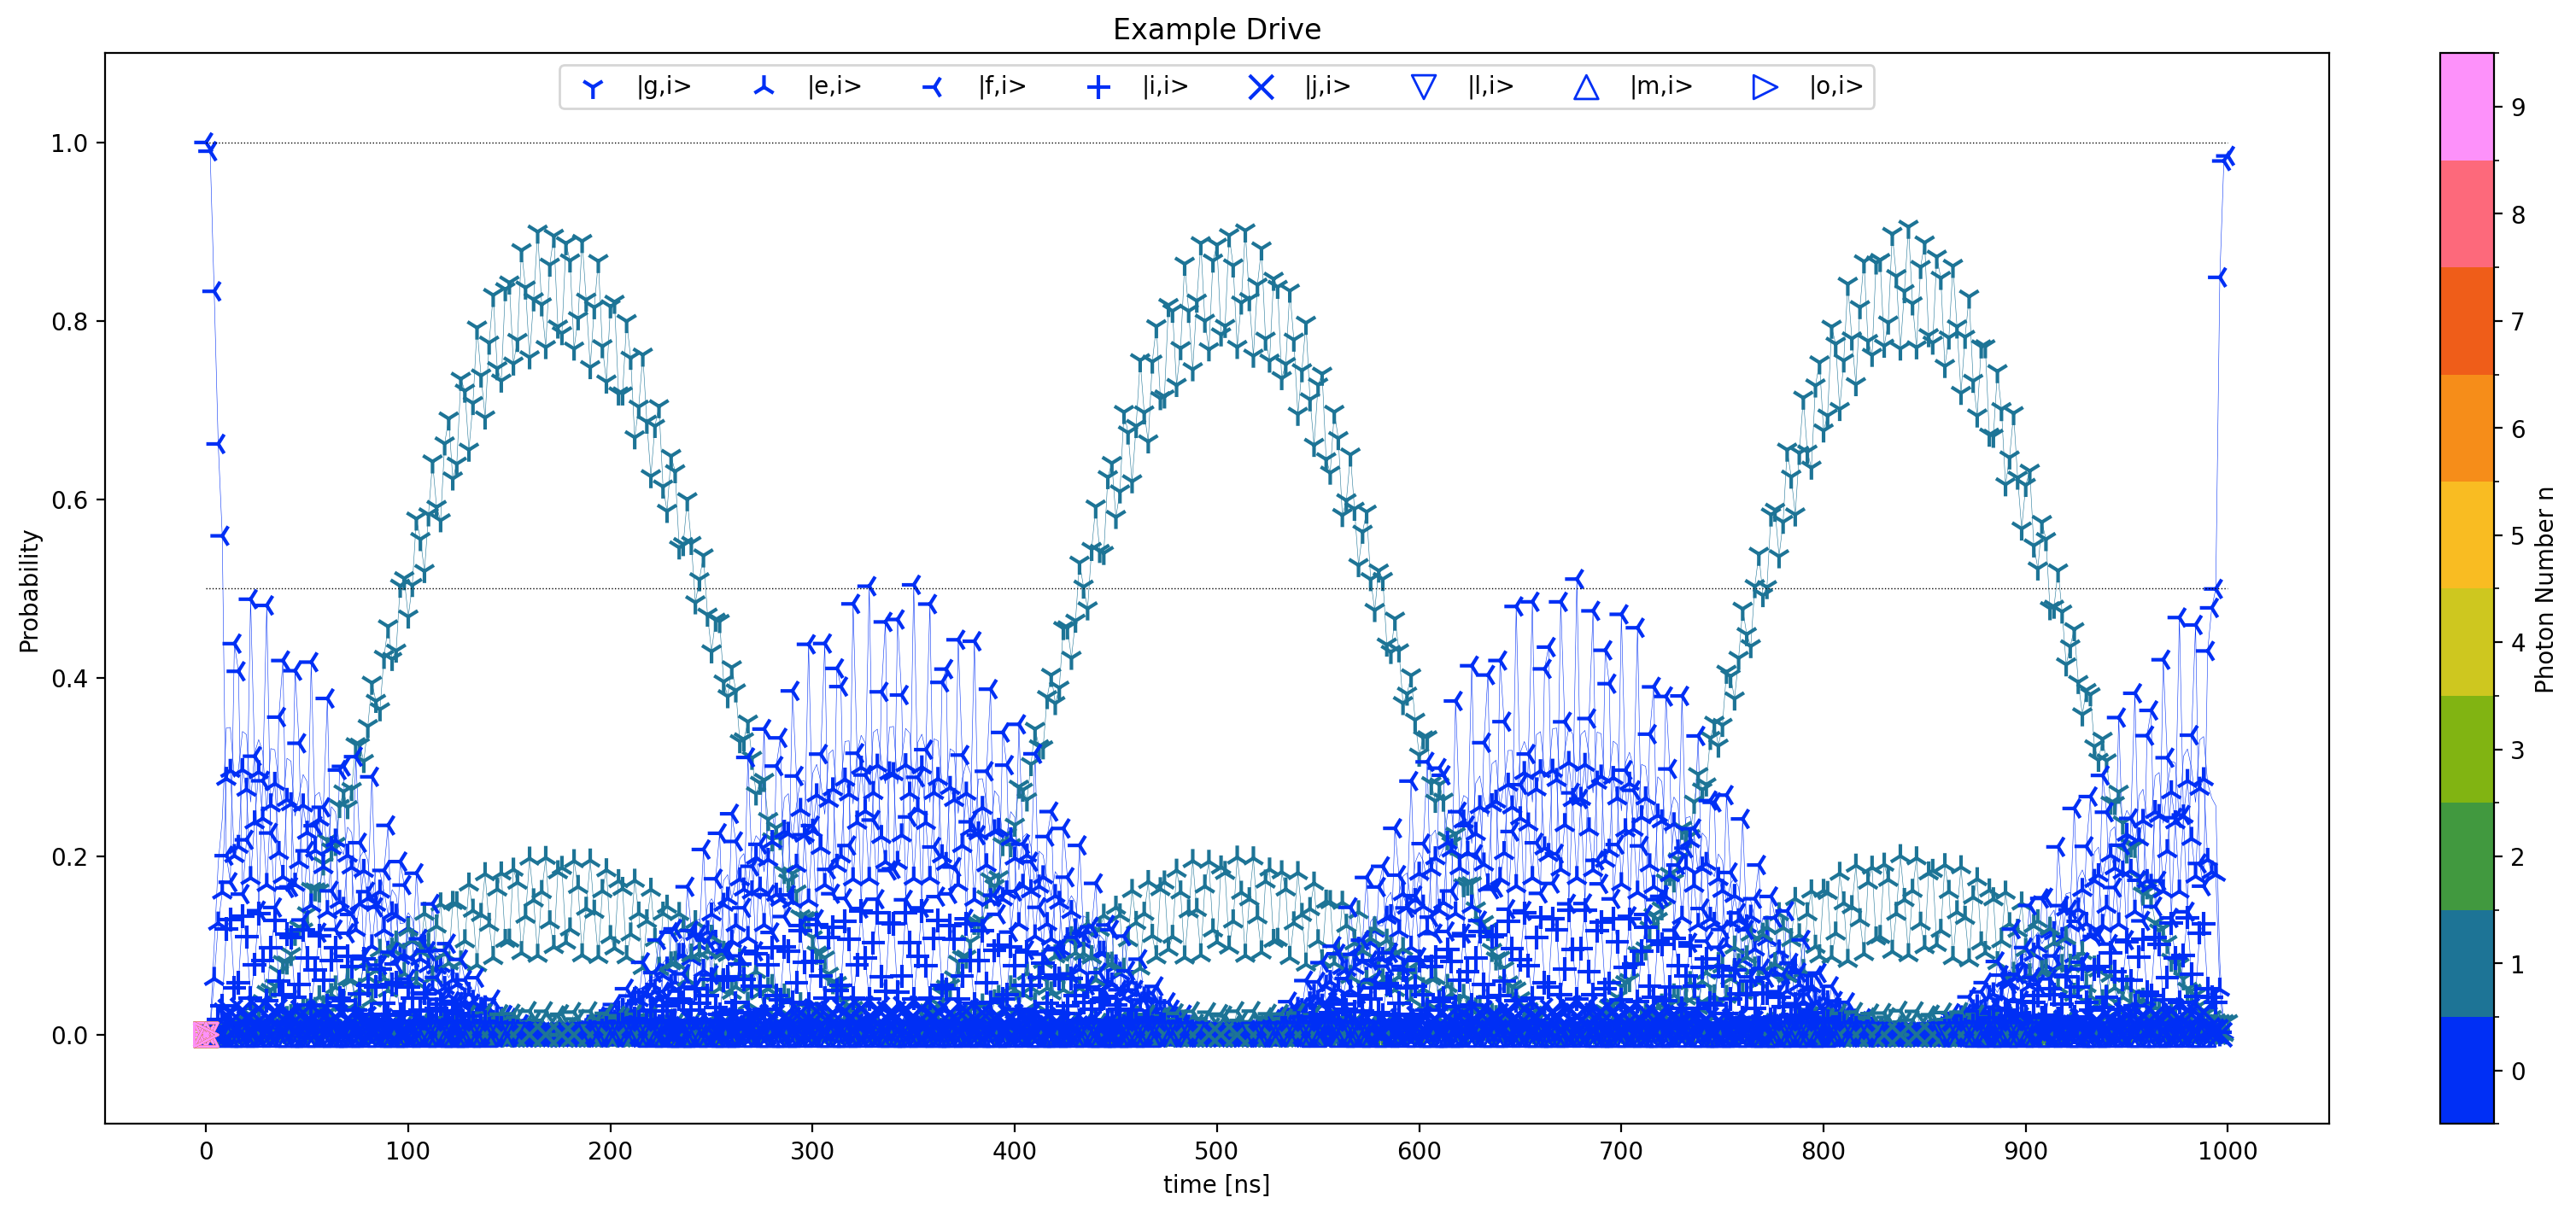

In [22]:
times = SingleDriveRes.times
psi_list = SingleDriveRes.states

kwargs = {'title': r'Example Drive', 'x_ticks': np.linspace(0,times[-1], 11), 'use_all_states':True, 'plots':['Probability'], 'legend_args':{'ncol':10, 'loc':'upper center'}, 'figsize':(30/2,7), 'dpi':200, 'debug': True, 'emphasis_alpha':0.05, 'markersize':100, 'small_amp_cutoff':1e-5, 'relative_phase':'e0'}

Main_Model.Plot_State_Evolution(times, psi_list, fig_kwargs = kwargs, plot_every = 20)#, timestamps = timestamps)


This is the same drive as the normal sb_f_0_Main. The reason it does not fully transition is because the ramp down is needed. This is done below.  

In [23]:
epsilon = Main_Model.op_drive_params_dict['sb_f_0_Main']['epsilon']
freq_d = Main_Model.op_drive_params_dict['sb_f_0_Main']['freq_d']
stark_shift = Main_Model.op_drive_params_dict['sb_f_0_Main']['shift']
pulse_time = Main_Model.op_drive_params_dict['sb_f_0_Main']['pulse_time']
args = {'Envelope':'Sine_Squared_Ramp', 'epsilon':epsilon, 'freq_d':freq_d, 'shift':stark_shift, 'pulse_time':pulse_time}
args['Envelope Args'] = {'ramp_time':10}

psi0 = Main_Model.get_dressed_state(['f',0])

SingleDriveRes_Short = Main_Model.Drive_State(psi0=psi0, args = args, spps = 10)

10.0%. Run time:   0.89s. Est. time left: 00:00:00:08
20.0%. Run time:   1.79s. Est. time left: 00:00:00:07
30.0%. Run time:   2.72s. Est. time left: 00:00:00:06
40.0%. Run time:   3.66s. Est. time left: 00:00:00:05
50.0%. Run time:   4.49s. Est. time left: 00:00:00:04
60.0%. Run time:   5.28s. Est. time left: 00:00:00:03
70.0%. Run time:   6.06s. Est. time left: 00:00:00:02
80.0%. Run time:   6.79s. Est. time left: 00:00:00:01
90.1%. Run time:   7.52s. Est. time left: 00:00:00:00
Total run time:   8.35s


Plotting Probability


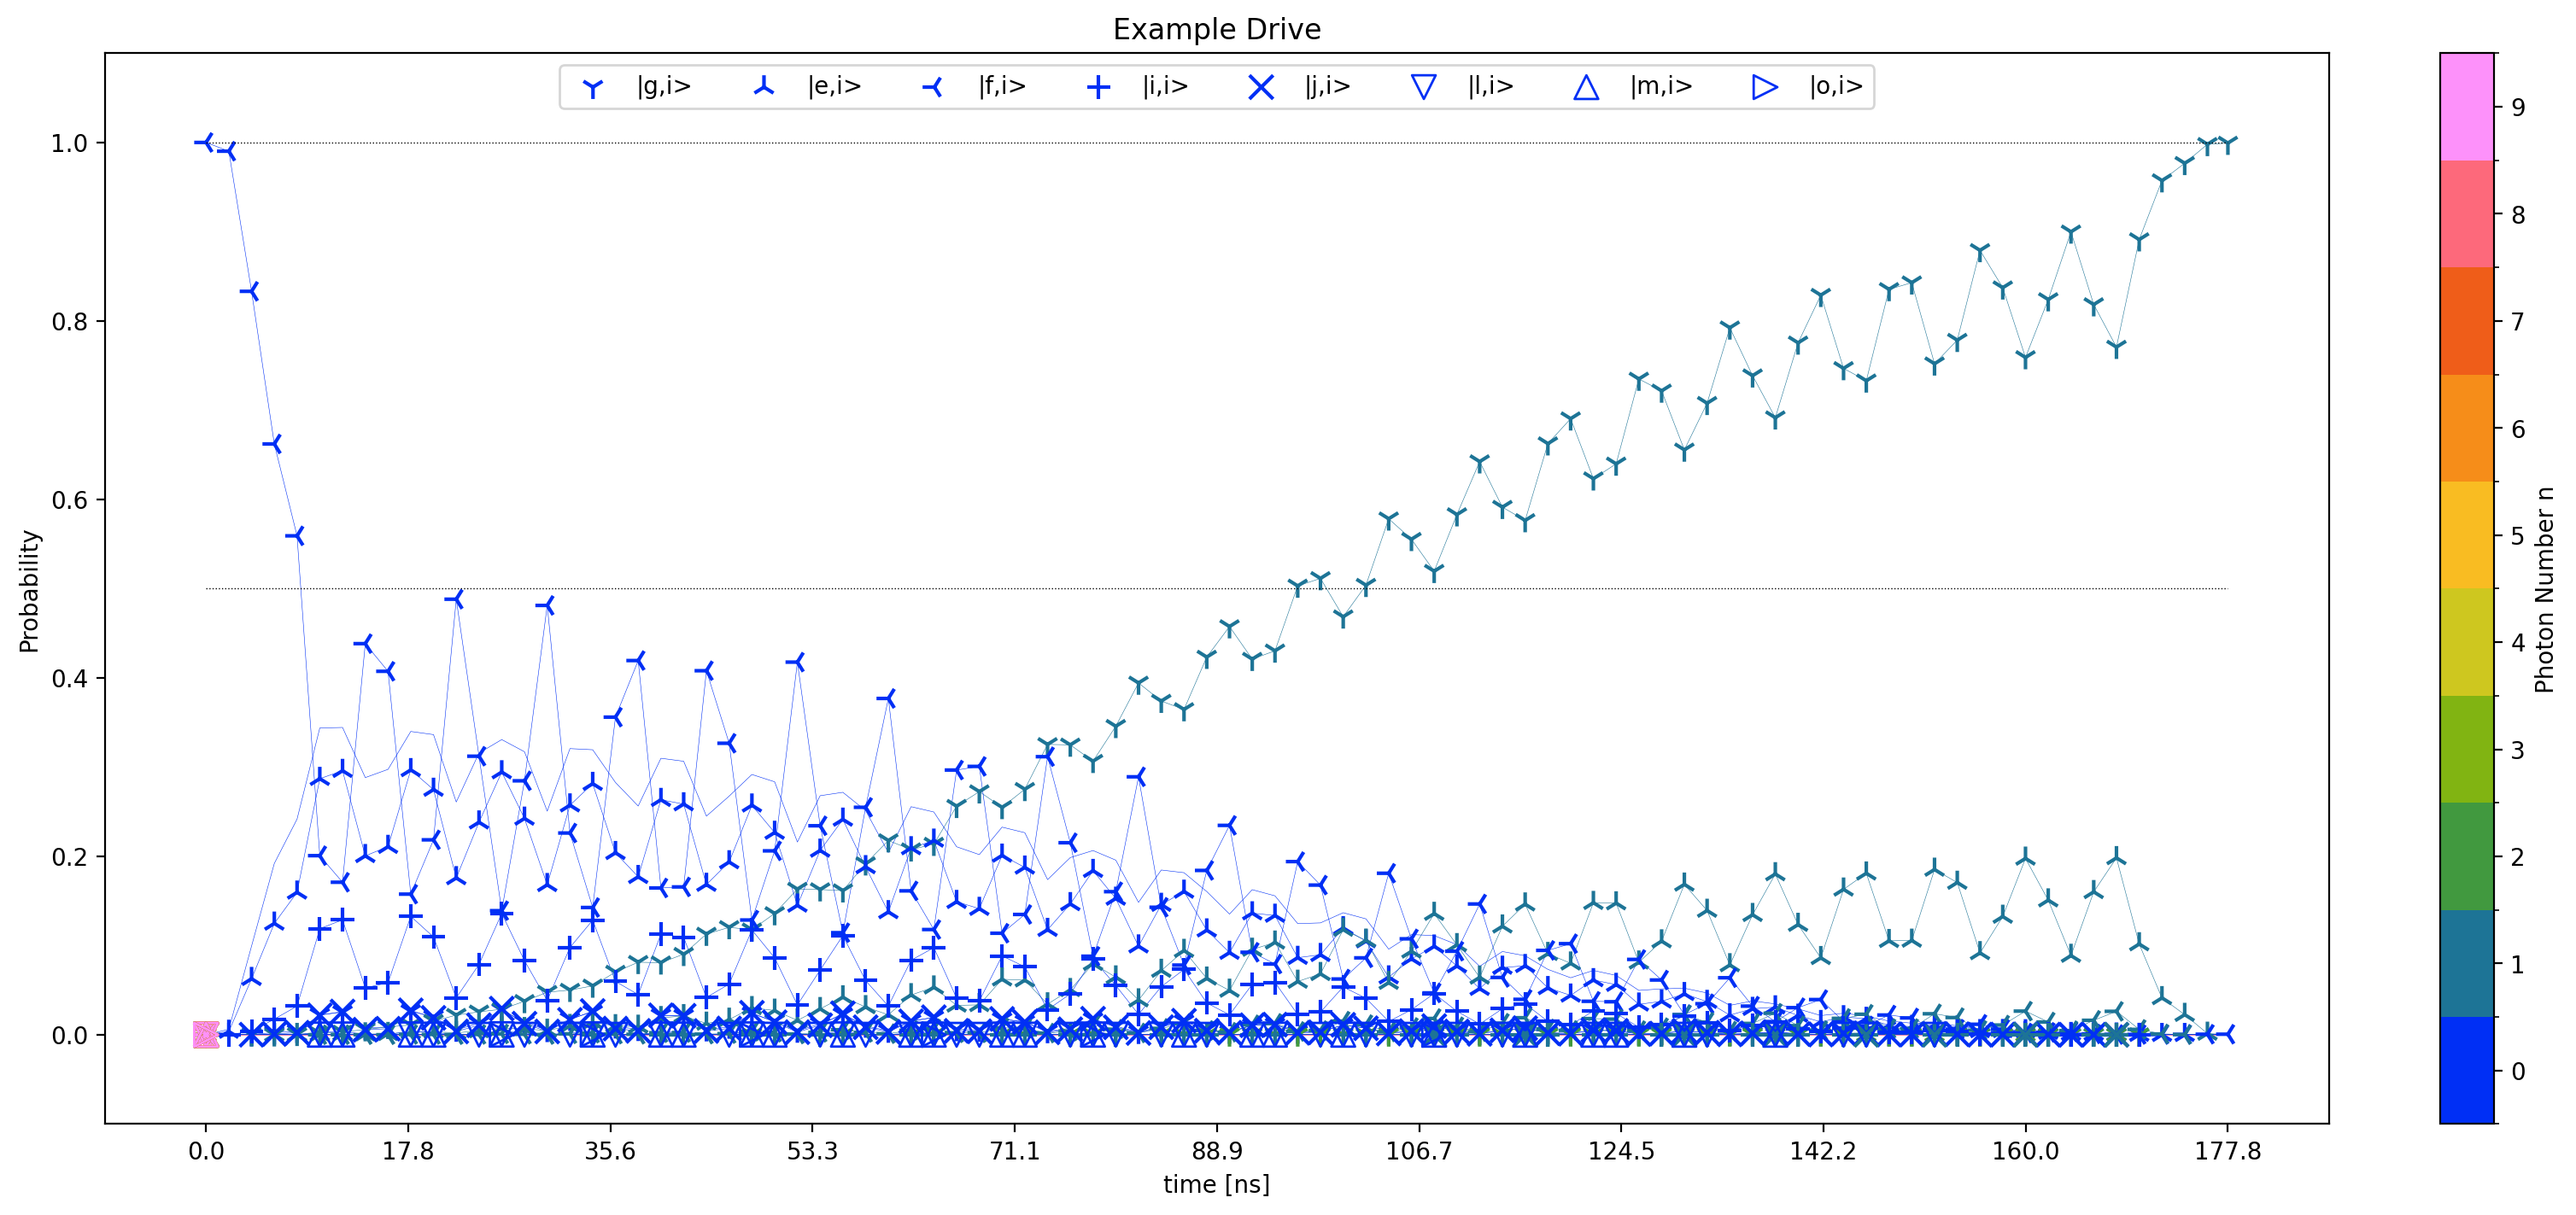

In [24]:
times = SingleDriveRes_Short.times
psi_list = SingleDriveRes_Short.states

kwargs = {'title': r'Example Drive', 'x_ticks': np.linspace(0,times[-1], 11), 'use_all_states':True, 'plots':['Probability'], 'legend_args':{'ncol':10, 'loc':'upper center'}, 'figsize':(30/2,7), 'dpi':200, 'debug': True, 'emphasis_alpha':0.05, 'markersize':100, 'small_amp_cutoff':1e-5, 'relative_phase':'e0'}

Main_Model.Plot_State_Evolution(times, psi_list, fig_kwargs = kwargs, plot_every = 20)#, timestamps = timestamps)


If there was no ramp, this would look like

In [25]:
epsilon = Main_Model.op_drive_params_dict['sb_f_0_Main']['epsilon']
freq_d = Main_Model.op_drive_params_dict['sb_f_0_Main']['freq_d']
stark_shift = Main_Model.op_drive_params_dict['sb_f_0_Main']['shift']
pulse_time = Main_Model.op_drive_params_dict['sb_f_0_Main']['pulse_time']
args = {'Envelope':'Sine_Squared_Ramp', 'epsilon':epsilon, 'freq_d':freq_d, 'shift':stark_shift, 'pulse_time':pulse_time}
args['Envelope Args'] = {'ramp_time':0.0001}

psi0 = Main_Model.get_dressed_state(['f',0])

SingleDriveRes_No_Ramp = Main_Model.Drive_State(psi0=psi0, args = args, spps = 10)

10.0%. Run time:   0.88s. Est. time left: 00:00:00:07
20.0%. Run time:   1.77s. Est. time left: 00:00:00:07
30.0%. Run time:   2.70s. Est. time left: 00:00:00:06
40.0%. Run time:   3.60s. Est. time left: 00:00:00:05
50.0%. Run time:   4.48s. Est. time left: 00:00:00:04
60.0%. Run time:   5.37s. Est. time left: 00:00:00:03
70.0%. Run time:   6.27s. Est. time left: 00:00:00:02
80.0%. Run time:   7.17s. Est. time left: 00:00:00:01
90.1%. Run time:   8.06s. Est. time left: 00:00:00:00
Total run time:   8.96s


Plotting Probability


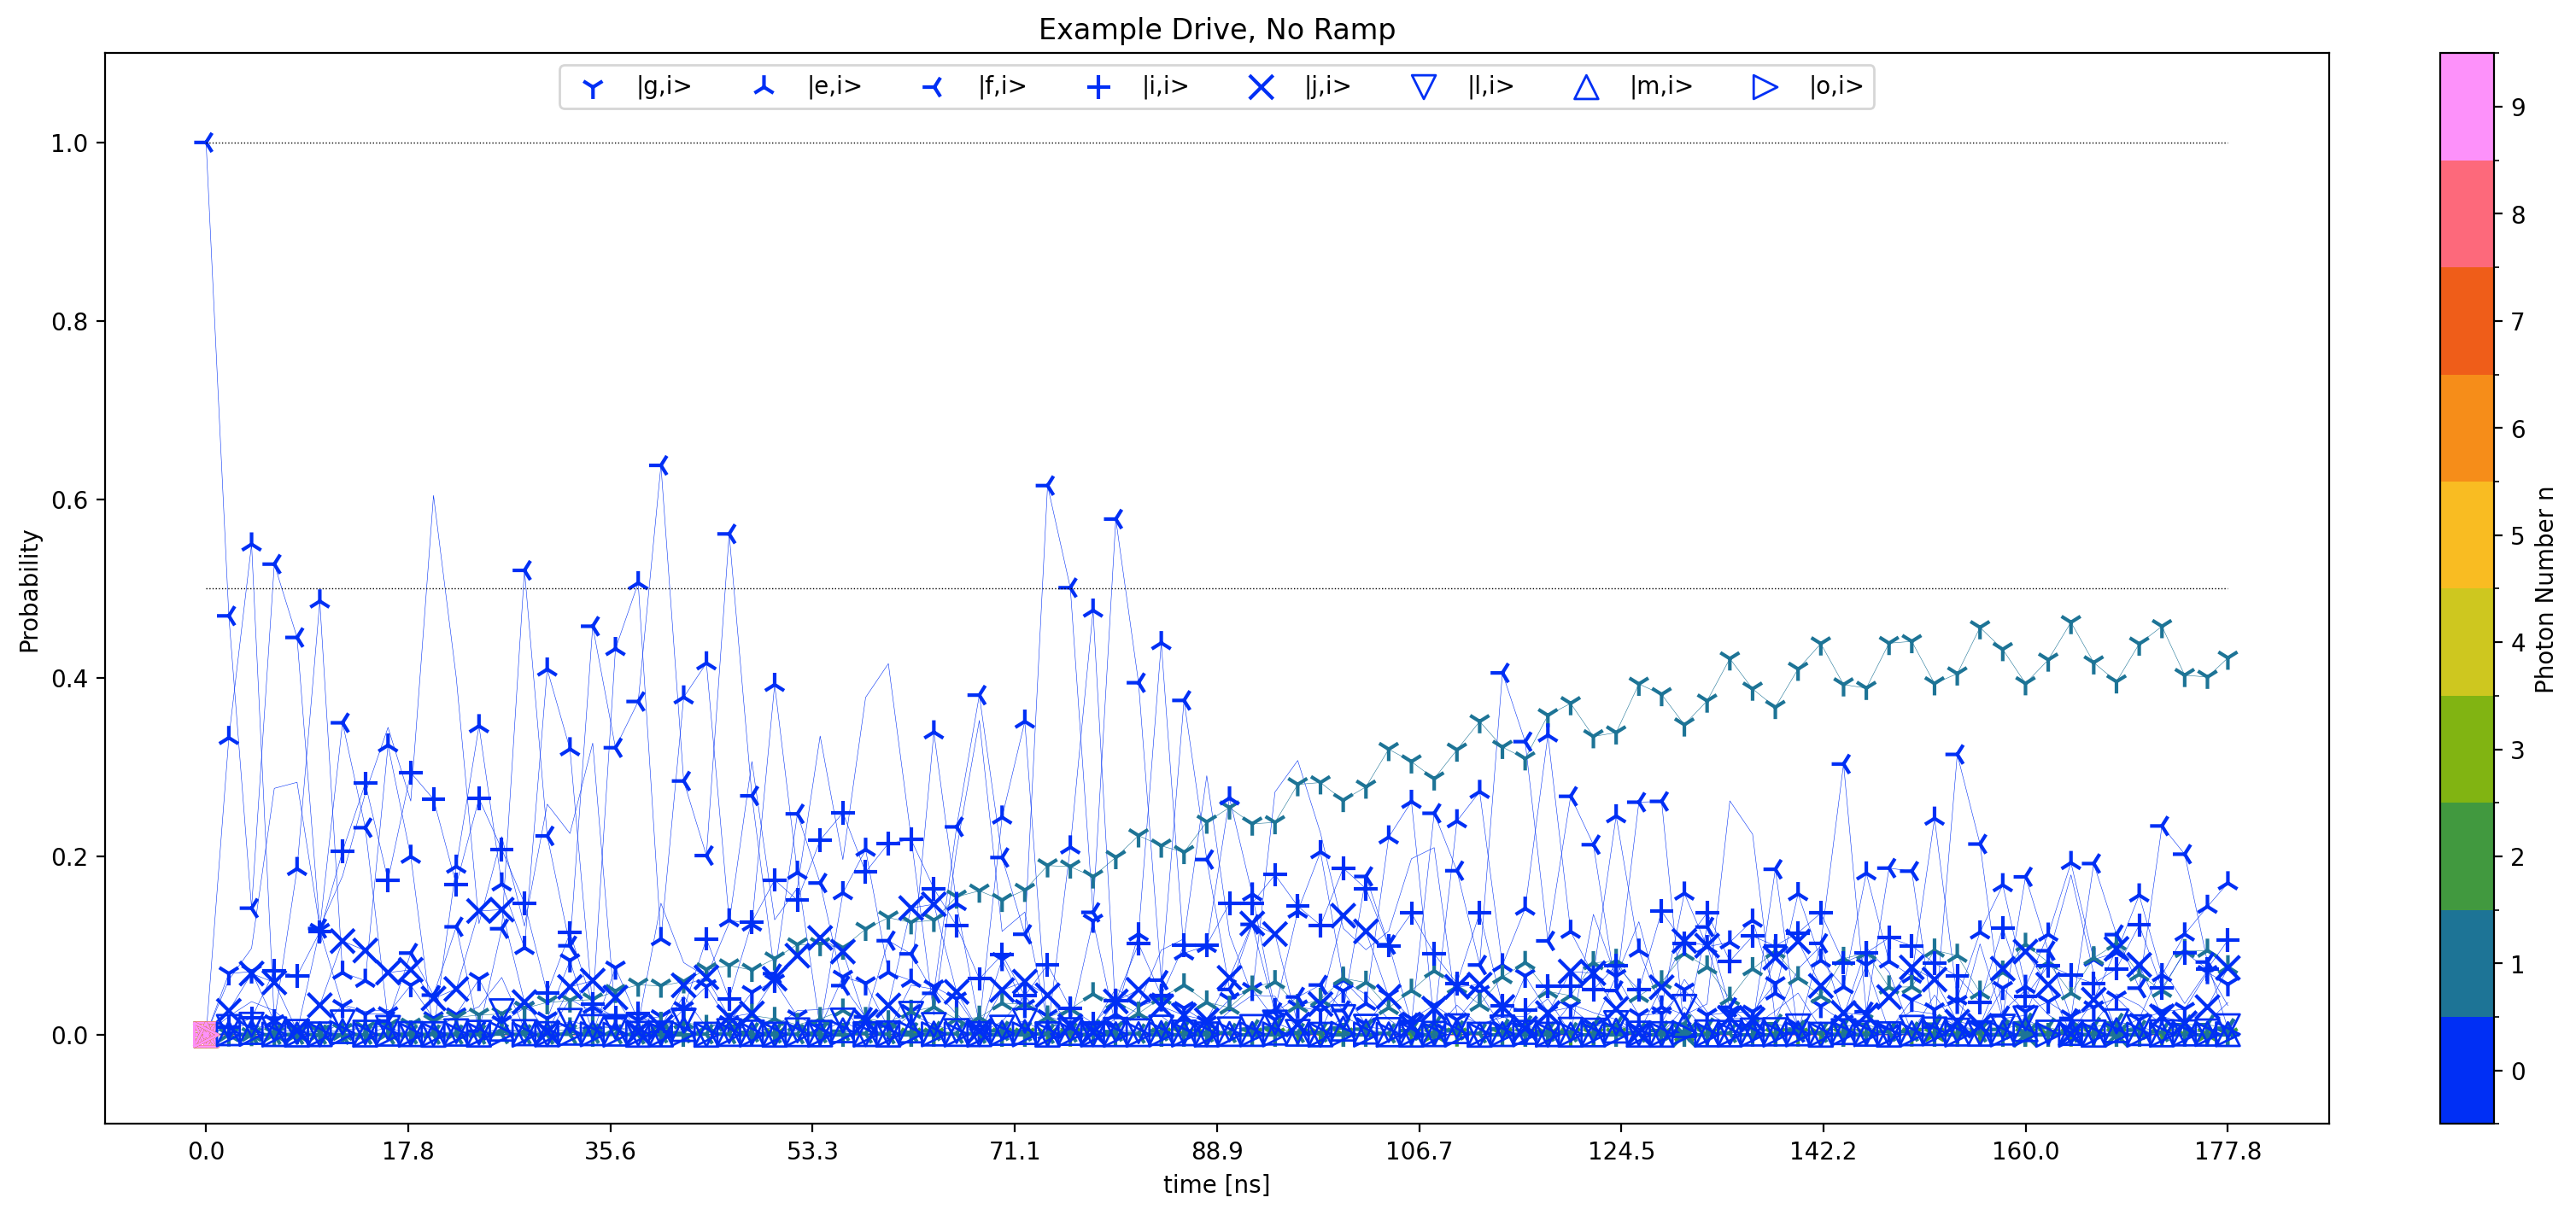

In [26]:
times = SingleDriveRes_No_Ramp.times
psi_list = SingleDriveRes_No_Ramp.states

kwargs = {'title': r'Example Drive, No Ramp', 'x_ticks': np.linspace(0,times[-1], 11), 'use_all_states':True, 'plots':['Probability'], 'legend_args':{'ncol':10, 'loc':'upper center'}, 'figsize':(30/2,7), 'dpi':200, 'debug': True, 'emphasis_alpha':0.05, 'markersize':100, 'small_amp_cutoff':1e-5, 'relative_phase':'e0'}

Main_Model.Plot_State_Evolution(times, psi_list, fig_kwargs = kwargs, plot_every = 20)#, timestamps = timestamps)


The instantaneous turning on of the drive signal kicks the system. The ramp is required to adiabatically connect the initial state to the floquet eigenstate so it evolves nicely. 

## Driving a Sequence of Pulses using the ".Run_Pulse_Sequence" Function

### Preparing $|g0\rangle+|g4\rangle$

#### Running the Simulation

In [9]:
ops_Zero_Plus_Four = ['q_g_0_Main', 'half_q_e_0', 'sb_f_0_Main', 'q_g_0_Main', 'q_e_0_Main', 'q_g_0_Main', 'sb_f_1_Main', 'q_g_0_Main', 'q_e_0_Main', 'q_g_0_Main', 'sb_f_2_Main', 'q_g_0_Main', 'q_e_0_Main', 'sb_f_3_Main']
psi0 = Main_Model.get_dressed_state(['g',0])

Zero_Plus_4_Res = Main_Model.Run_Pulse_Sequence(psi0, ops_Zero_Plus_Four)



 Doing Gate 1/14 (q_g_0_Main), Gate Time: 100.0
-------------------------------------------------------------------
10.1%. Run time:   0.78s. Est. time left: 00:00:00:06
20.1%. Run time:   1.50s. Est. time left: 00:00:00:05
30.1%. Run time:   2.20s. Est. time left: 00:00:00:05
40.1%. Run time:   2.91s. Est. time left: 00:00:00:04
50.0%. Run time:   3.61s. Est. time left: 00:00:00:03
60.0%. Run time:   4.30s. Est. time left: 00:00:00:02
70.0%. Run time:   4.96s. Est. time left: 00:00:00:02
80.0%. Run time:   5.60s. Est. time left: 00:00:00:01
90.0%. Run time:   6.20s. Est. time left: 00:00:00:00
Total run time:   6.78s

 Doing Gate 2/14 (half_q_e_0), Gate Time: 35.48
-------------------------------------------------------------------
10.1%. Run time:   0.21s. Est. time left: 00:00:00:01
20.2%. Run time:   0.42s. Est. time left: 00:00:00:01
30.1%. Run time:   0.65s. Est. time left: 00:00:00:01
40.2%. Run time:   0.86s. Est. time left: 00:00:00:01
50.0%. Run time:   1.07s. Est. time left

 /local/gr400/Git Repositories/Code-Demos/Transmon Cavity Mode Code/Code/Transmon_Cavity_Model.py: 993

#### Making Plot

Plotting Probability


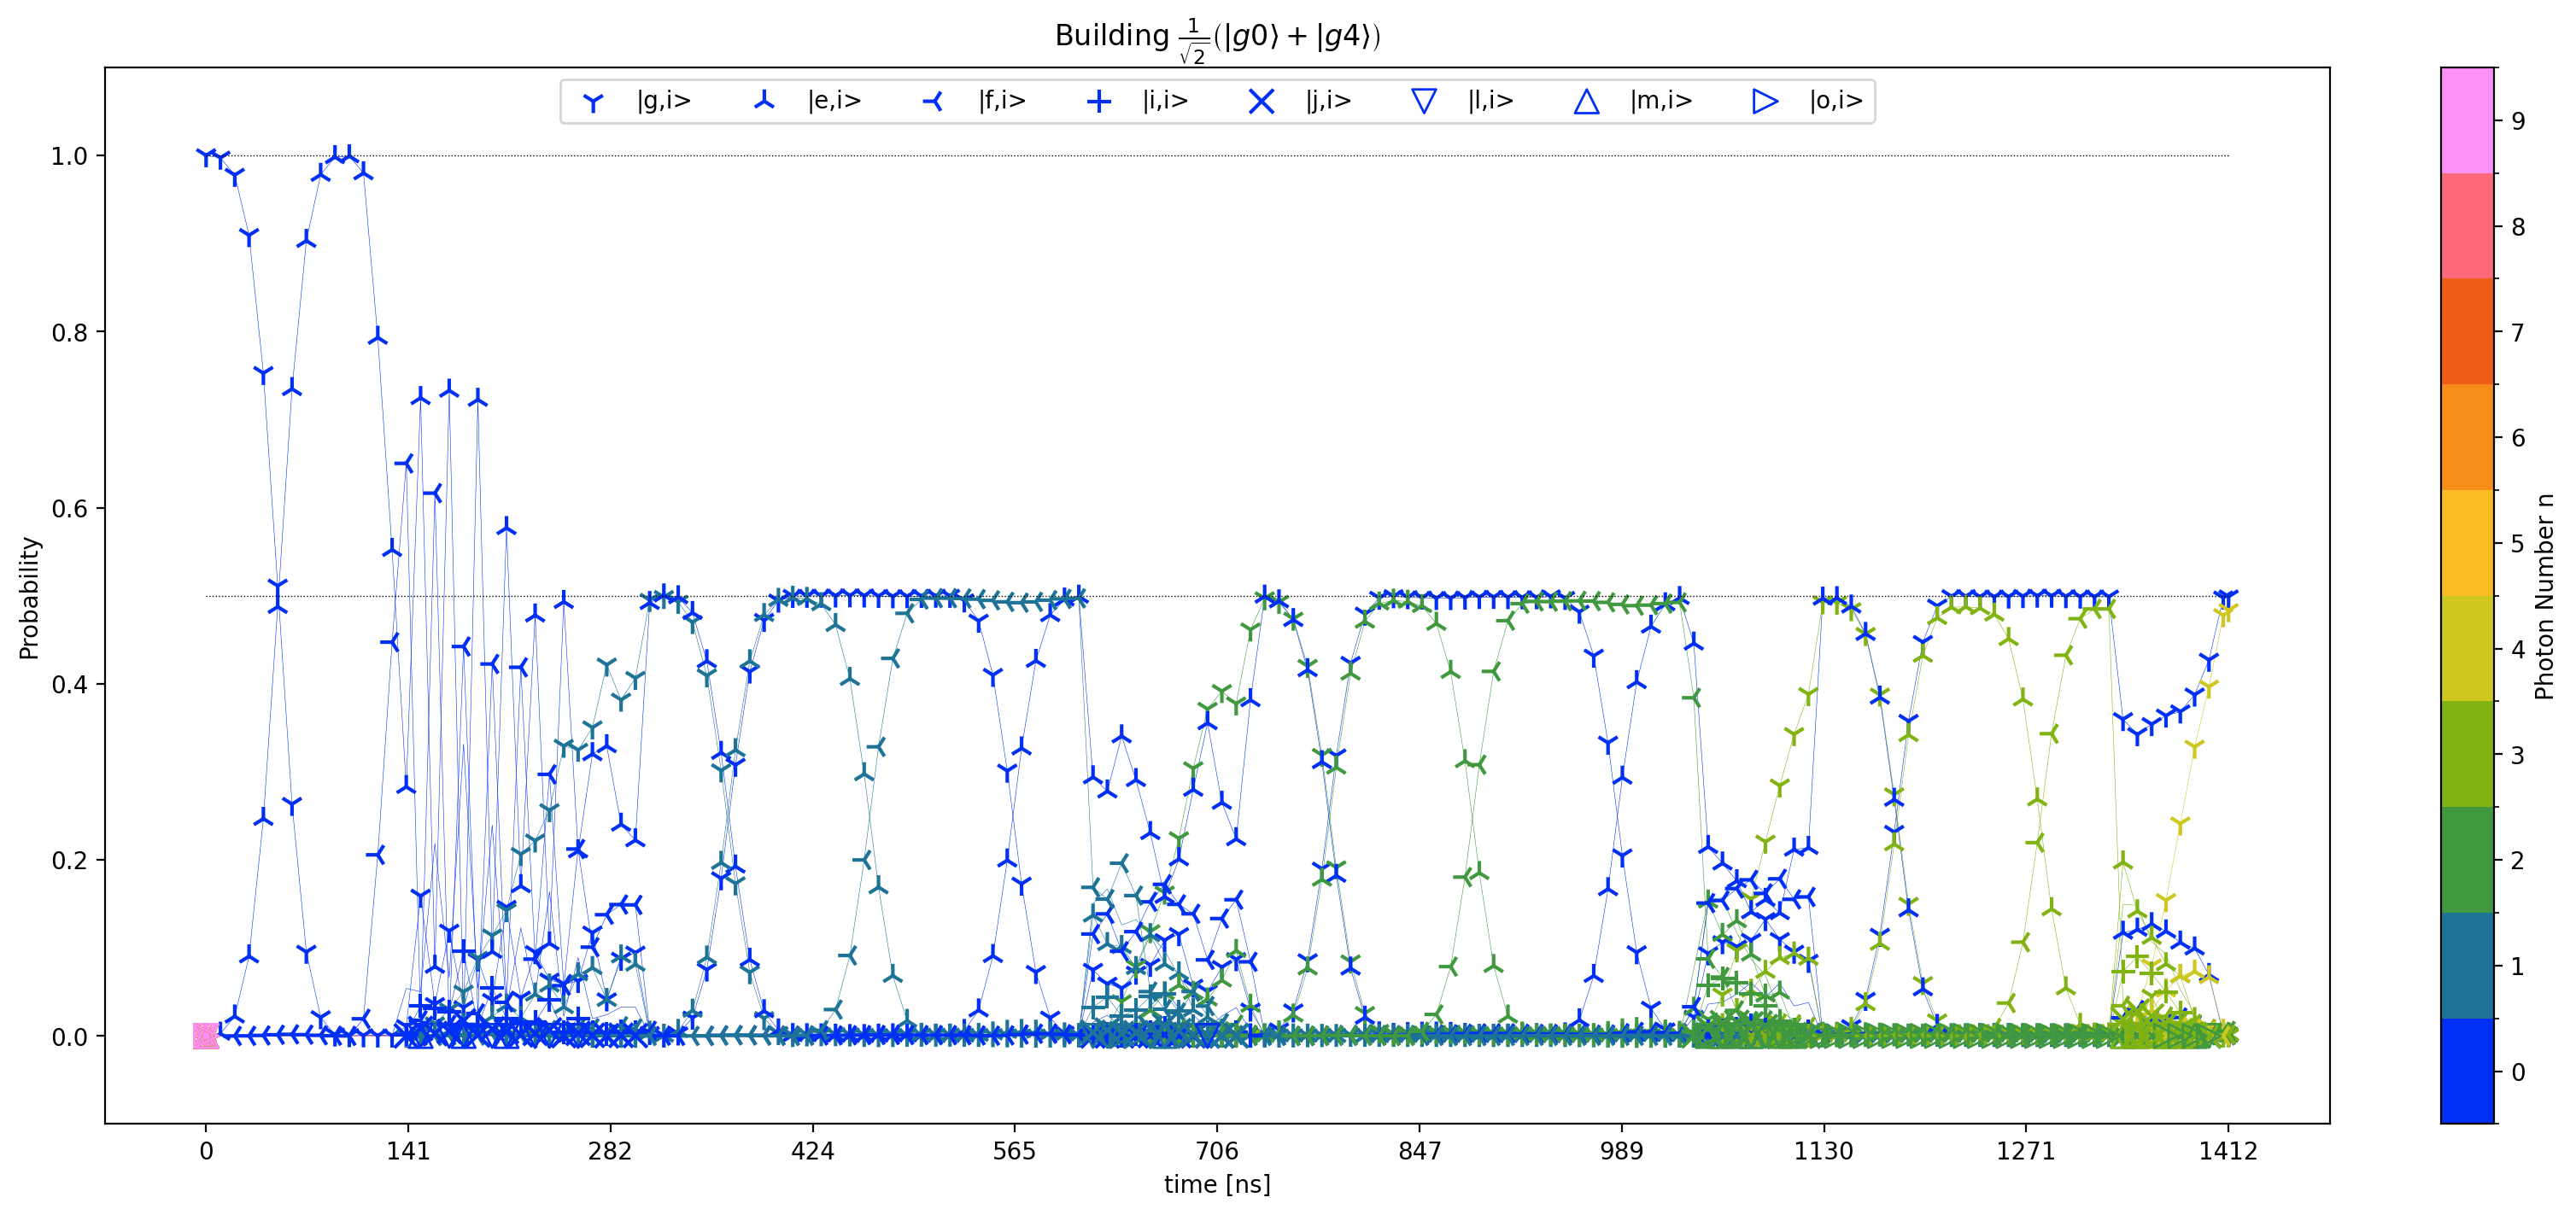

In [11]:
times = Zero_Plus_4_Res[0]
psi_list = Zero_Plus_4_Res[1]

kwargs = {'title': r'Building $\frac{1}{\sqrt{2}}\left(|g0\rangle+|g4\rangle\right)$', 'x_ticks': np.linspace(0,times[-1], 11), 'use_all_states':True, 'plots':['Probability'], 'legend_args':{'ncol':10, 'loc':'upper center'}, 'figsize':(30/2,7), 'dpi':200, 'debug': True, 'emphasis_alpha':0.05, 'markersize':100, 'small_amp_cutoff':1e-5, 'relative_phase':'e0'}

Main_Model.Plot_State_Evolution(times, psi_list, fig_kwargs = kwargs, plot_every = 100)#, timestamps = timestamps)

### Enconding $|g0\rangle+|e0\rangle$ Into a Binomial Code

This sends $$|g0\rangle\to \frac{1}{\sqrt{2}}\left(|g0\rangle+|g4\rangle\right)$$ and $$|e0\rangle\to |g2\rangle$$

#### Running Simulation

In [5]:
psi0 = Main_Model.get_dressed_state(['g',0])+Main_Model.get_dressed_state(['e',0])
psi0 = psi0/psi0.norm()
ops_Binoimal_Code = ['q_e_0_Main', 'q_g_0_Main', 'sb_f_0_Main', 'q_g_0_Main', 'q_e_0_Main', 'q_g_1_Main', 'half_sb_f_1', 'q_g_1_Main', 'q_e_0_Main', 'sb_f_2_Main', 'q_g_2_Main', 'sb_f_0_Main', 'q_e_0_Main', 'sb_f_0_4pi_f_3', 'q_g_1_Main', 'sb_f_3_Main', 'q_e_0_Main', 'sb_f_1_2pi_f_3']

Binomial_Code_Res = Main_Model.Run_Pulse_Sequence(psi0, ops_Binoimal_Code)


 Doing Gate 1/18 (q_e_0_Main), Gate Time: 99.4
-------------------------------------------------------------------
10.1%. Run time:   0.71s. Est. time left: 00:00:00:06
20.0%. Run time:   1.40s. Est. time left: 00:00:00:05
30.1%. Run time:   2.10s. Est. time left: 00:00:00:04
40.0%. Run time:   2.79s. Est. time left: 00:00:00:04
50.1%. Run time:   3.50s. Est. time left: 00:00:00:03
60.0%. Run time:   4.19s. Est. time left: 00:00:00:02
70.1%. Run time:   4.90s. Est. time left: 00:00:00:02
80.0%. Run time:   5.59s. Est. time left: 00:00:00:01
90.1%. Run time:   6.29s. Est. time left: 00:00:00:00
Total run time:   6.96s

 Doing Gate 2/18 (q_g_0_Main), Gate Time: 100.0
-------------------------------------------------------------------
10.1%. Run time:   0.70s. Est. time left: 00:00:00:06
20.1%. Run time:   1.40s. Est. time left: 00:00:00:05
30.1%. Run time:   2.09s. Est. time left: 00:00:00:04
40.1%. Run time:   2.79s. Est. time left: 00:00:00:04
50.0%. Run time:   3.47s. Est. time left:

 /local/gr400/Git Repositories/Code-Demos/Transmon Cavity Mode Code/Code/Transmon_Cavity_Model.py: 993

#### Making Plot

Plotting Probability


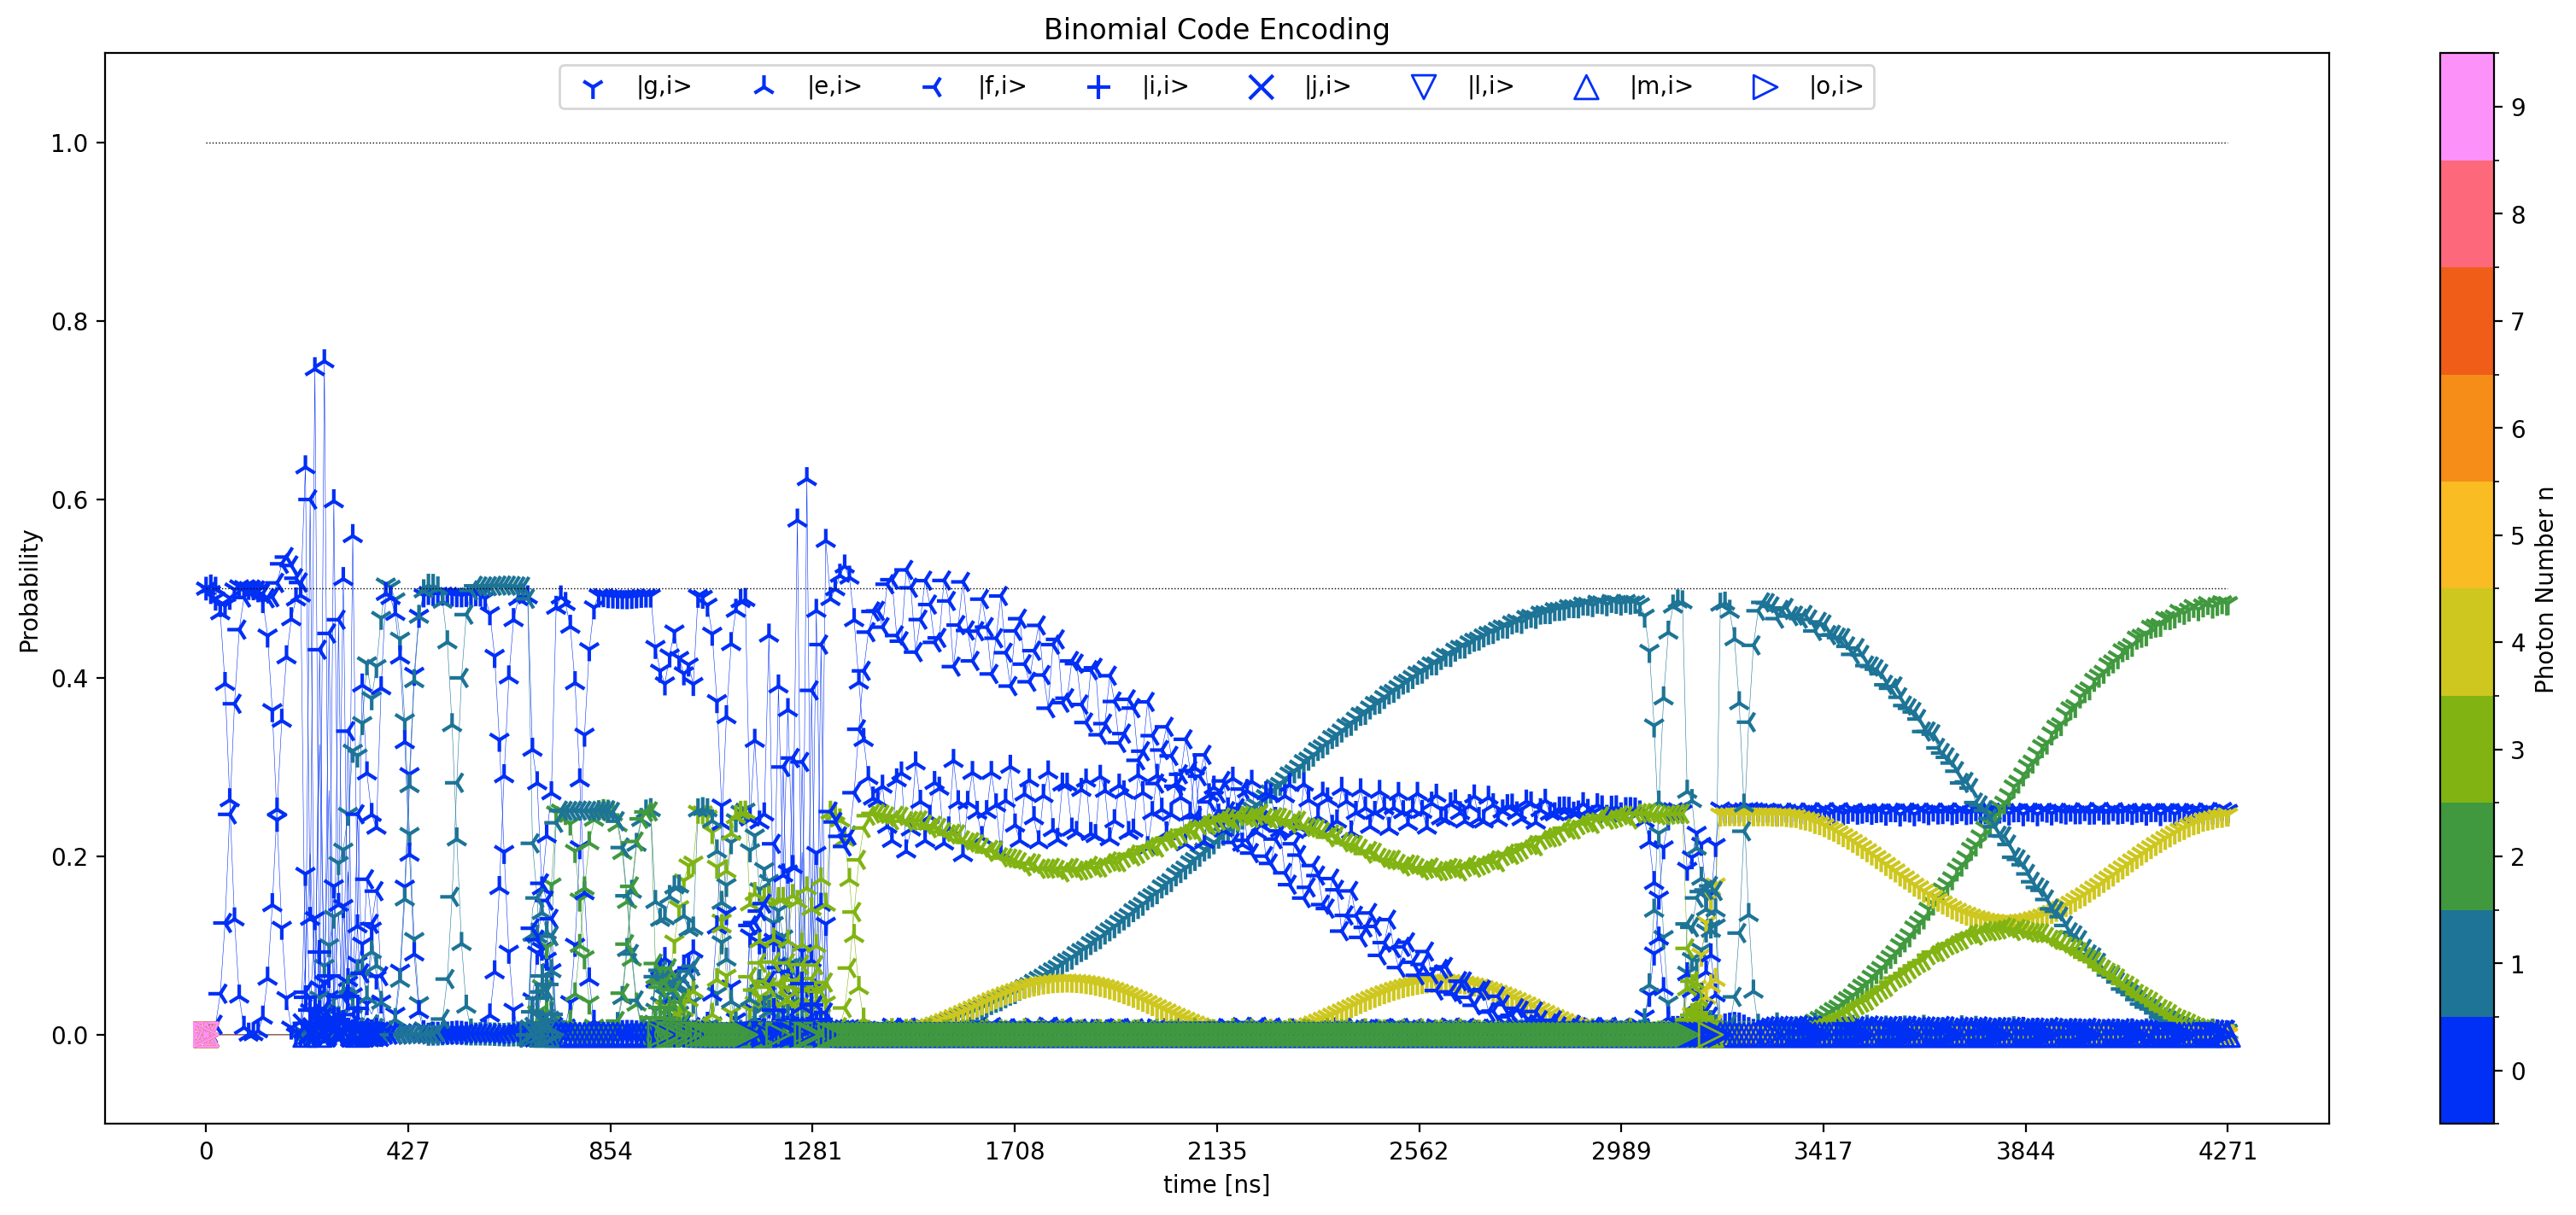

In [10]:
times = Binomial_Code_Res[0]
psi_list = Binomial_Code_Res[1]

kwargs = {'title': f'Binomial Code Encoding', 'x_ticks': np.linspace(0,times[-1], 11), 'use_all_states':True, 'plots':['Probability'], 'legend_args':{'ncol':10, 'loc':'upper center'}, 'figsize':(30/2,7), 'dpi':200, 'debug': True, 'emphasis_alpha':0.05, 'markersize':100, 'small_amp_cutoff':1e-5, 'relative_phase':'e0'}

Main_Model.Plot_State_Evolution(times, psi_list, fig_kwargs = kwargs, plot_every = 100)#, timestamps = timestamps)